# Parte 2 - Python

##### Fabián Tovar

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.

### Lectura de los datos del CSV y limpieza en caso de existir irregularidades

In [15]:
df = pd.read_csv('Prueba_Python_practicante.csv', 
                 sep=';',
                 #encoding='utf-8',  # (latin-1, cp1252)
                 na_values=['', ' ', 'NULL', 'null', 'NaN', 'nan', '#N/A', 'N/A'],  # valores nulos
                 keep_default_na=True,  #valores nulos por defecto de pandas
                 dtype={
                     'BPEmp': 'Int64',      # =! int64
                     'Subregion': 'string',
                     'SeccionEconomicaEmp': 'string', 
                     'ClaseEconomica': 'string',
                     'Periodo': 'string',
                     'Cantidad Afiliados': 'Int64'  # =! int64
                 })

text_columns = ['Subregion', 'SeccionEconomicaEmp', 'ClaseEconomica']
for col in text_columns:
    df[col] = df[col].str.strip()

# Verificar valores nulos
print("Verificación de valores nulos:")
print(df.isnull().sum())
print(f"\nTotal de filas: {len(df)}")
print(f"Filas con al menos un valor nulo: {df.isnull().any(axis=1).sum()}")

df['Periodo'] = pd.to_datetime(df['Periodo'], format='%Y%m').dt.to_period('M')

# columnas útiles para análisis temporal
df['Año'] = df['Periodo'].dt.year
df['Mes'] = df['Periodo'].dt.month

print(df.head())
print(df.info())

Verificación de valores nulos:
BPEmp                  0
Subregion              0
SeccionEconomicaEmp    0
ClaseEconomica         0
Periodo                0
Cantidad Afiliados     0
dtype: int64

Total de filas: 47232
Filas con al menos un valor nulo: 0
      BPEmp        Subregion             SeccionEconomicaEmp  \
0  60022321  Valle de Aburra     C_Industrias Manufactureras   
1  70063983  Valle de Aburra   G_Comercio y Rep. Automotores   
2  70079130  Valle de Aburra     C_Industrias Manufactureras   
3  70038481  Valle de Aburra                  F_Construcción   
4  70089227  Valle de Aburra  M_Act. profesionales, cie. tec   

                                      ClaseEconomica  Periodo  \
0           Industrias básicas de hierro y de acero.  2023-10   
1  Comercio al por mayor de materiales de constru...  2023-10   
2  Mantenimiento y reparación especializado de pr...  2023-12   
3   Construcción de otras obras de ingeniería civil.  2023-10   
4          Actividades de administrac

En la celda anterior hice una exploración básica de los datos, tipo de datos, valores nulos y descripción global. Con esto puedo asegurarme de que todo está saliendo bien en el paso de la base de datos de un formato a otro. También me aseguré de que el campo "Periodo" quede con la convención correcta, dado que inicialmente en el archivo .csv no se diferenciaba entre el año y el mes, tenía estilo YYYYMM. Así que, le asigné el formato YYYY-MM. Con esto ya es posible realizar distintos tipos de operaciones con este campo.

Ahora utilizaré una herramienta útil de la librería Seaborn, para intentar encontrar relaiciones entre columnas (principalmente numéricas). Esta herramienta genera una matriz de diagramas que más se ajusta de acuerdo a una agrupación por pares entre los elementos del Dataframe de Pandas

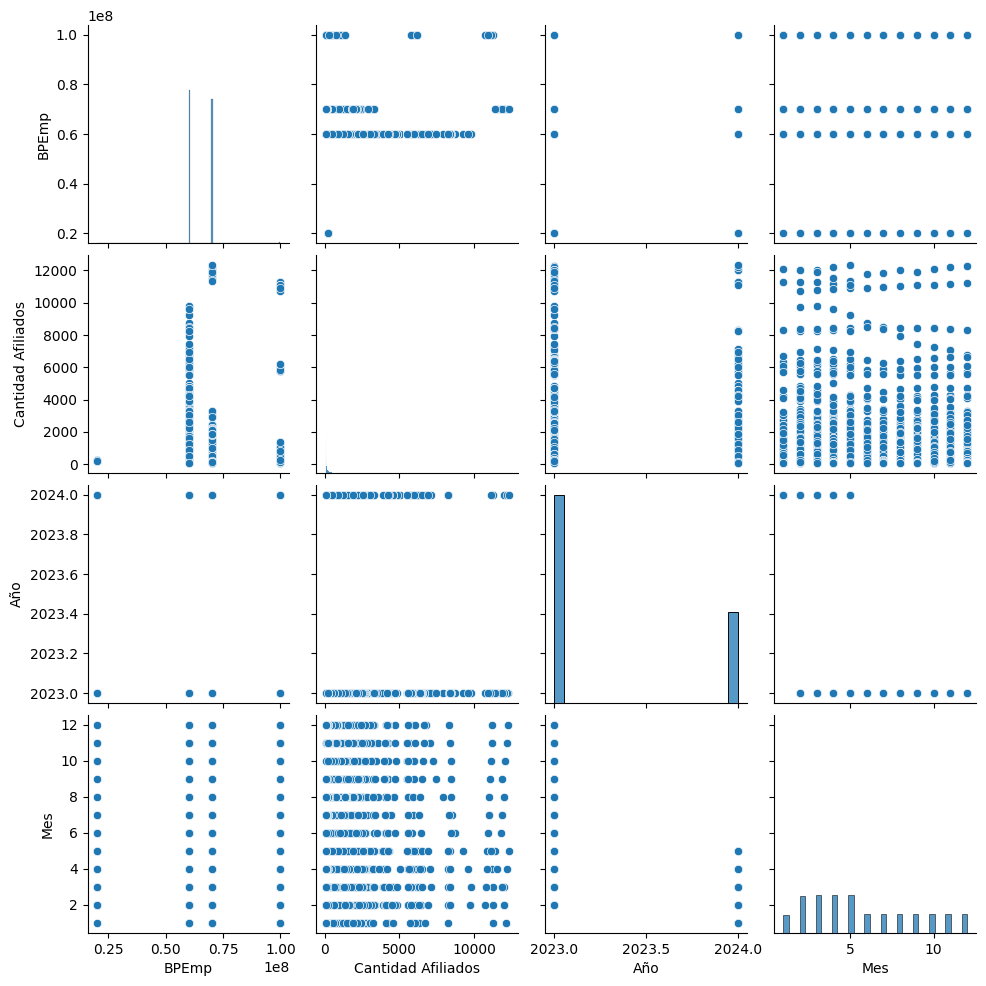

In [ ]:
#Bosquejo General. Búsqueda de Relaciones.
sns.pairplot(df)

Esta matriz no reveló algo que pueda ser muy relevante o siquiera interesante.

## 2.